# Quantum Computing with Multiple Qubits: A Mathematical Approach

In this notebook, I give an overview of the controlled-NOT gate and show the mathematical operations it performs alone and in conjunction with the $X$ gate and Hadamard gate. I also show these gates give the expected result in Qiskit. Basic knowledge of matrix algebra is useful to understand the math I discuss here. For beginners, I recommend reviewing *Quantum Computing I - One Qubit* before this notebook.

In [2]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

## Introduction

Last time, I introduced qubits, which can exist in one of two pure states or a superposition of the two. In a system of two qubits, there are four possible states:

<br>

<center>$\vert0\rangle$ and $\vert0\rangle$<center>
<br>
<center>$\vert0\rangle$ and $\vert1\rangle$<center>
<br>
<center>$\vert1\rangle$ and $\vert0\rangle$<center>
<br>
<center>$\vert1\rangle$ and $\vert1\rangle$<center>

Just like with one qubit, these states can be represented by orthonormal basis vectors:

<br>

<center>$\vert0\rangle$ and $\vert0\rangle = \vert00\rangle = \begin{bmatrix}1\\0\\0\\0\end{bmatrix}$<center> 
<br>
<center>$\vert0\rangle$ and $\vert1\rangle = \vert01\rangle = \begin{bmatrix}0\\1\\0\\0\end{bmatrix}$<center>
<br>
<center>$\vert1\rangle$ and $\vert0\rangle = \vert10\rangle = \begin{bmatrix}0\\0\\1\\0\end{bmatrix}$<center>
<br>
<center>$\vert1\rangle$ and $\vert1\rangle = \vert11\rangle = \begin{bmatrix}0\\0\\0\\1\end{bmatrix}$<center>

We already know that the convention for the starting state of a qubit is $\vert0\rangle$. So, the starting state for a circuit with two qubits is $\vert00\rangle$. I will demonstrate this with Qiskit in the cells below.

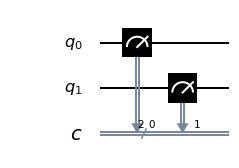

In [3]:
# Initialize a quantum circuit with two qubits and two classical bits for readout
cir = QuantumCircuit(2,2)

# Perform a measurement on the first qubit that reads out to the first classical bit.
# 0 is the index for both the qubit and the classical bit
cir.measure(0,0)

# Perform a measurement on the second qubit that reads out to the second classical bit.
# 1 is the index for both the qubit and the classical bit
cir.measure(1,1)

# Draw the circuit
cir.draw('mpl')

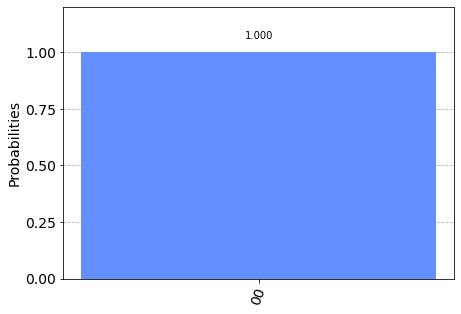

In [4]:
# Choose a quantum computer simulator on which to execute the circuit
sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the chosen simulator 100 times
result = execute(cir, sim, shots=100).result()

# Count the number of times the classical bit read out 0 or 1
counts = result.get_counts(cir)

# Plot the histogram of the counts
plot_histogram(counts)

As you can see, when no gates are applied, the circuit reads out $\vert00\rangle$. Like I demonstrated in the last notebook, there are many gates one can apply to change the value of one qubit. In the cells below, I will demonstrate the effects of applying the $X$ gate to one or both qubits.

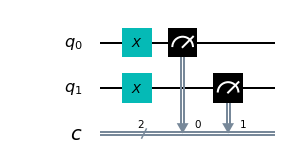

In [8]:
cir = QuantumCircuit(2,2)

# Apply the X gate to the first qubit (index 0)
cir.x(0)

# Apply the X gate to the second qubit (index 1)
cir.x(1)

cir.measure(0,0)
cir.measure(1,1)

# Draw the circuit
cir.draw('mpl')

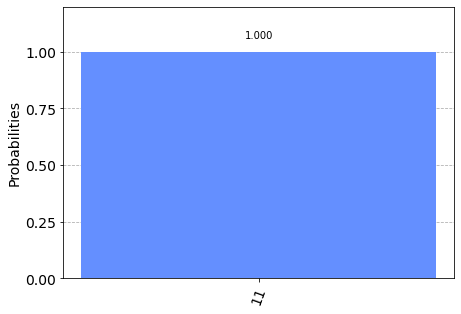

In [9]:
sim = Aer.get_backend('qasm_simulator')
result = execute(cir, sim, shots=100).result()
counts = result.get_counts(cir)
plot_histogram(counts)

As we expected, both qubits were put into state $\vert1\rangle$, so the only possible output is $\vert11\rangle$.

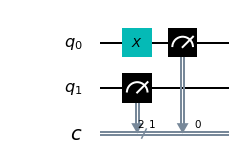

In [6]:
cir = QuantumCircuit(2,2)

# Apply the X gate to only the first qubit (index 0)
cir.x(0)

cir.measure(0,0)
cir.measure(1,1)

# Draw the circuit
cir.draw('mpl')

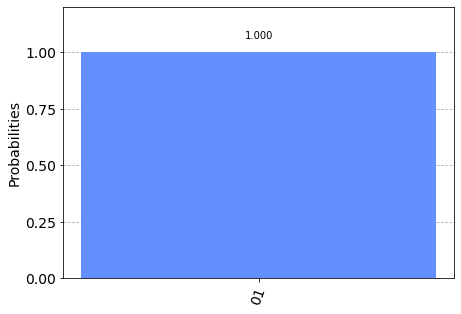

In [7]:
sim = Aer.get_backend('qasm_simulator')
result = execute(cir, sim, shots=100).result()
counts = result.get_counts(cir)
plot_histogram(counts)

We know that the $X$ gate performed a bit flip on the first qubit, so it should now be in state $\vert1\rangle$. The second qubit should still be in state $\vert0\rangle$. Interestingly, our output state is $\vert01\rangle$. This is simply due to the convention Qiskit uses - they list qubits from right to left. So, when we read left to right, the value of the second qubit is listed before the value of the first.

In the last notebook, I demonstrated that the Hadamard gate serves to put two qubits into superposition. In the cells below, I will demonstrate the effects of applying the Hadamard gate to one or both qubits.

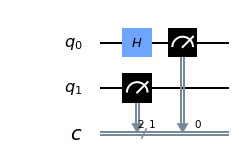

In [10]:
cir = QuantumCircuit(2,2)

# Apply the Hadamard gate to the first qubit (index 0)
cir.h(0)

cir.measure(0,0)
cir.measure(1,1)

# Draw the circuit
cir.draw('mpl')

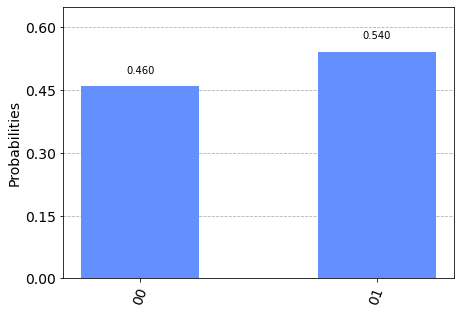

In [11]:
sim = Aer.get_backend('qasm_simulator')
result = execute(cir, sim, shots=100).result()
counts = result.get_counts(cir)
plot_histogram(counts)

We know the second qubit will only be measured in the $\vert0\rangle$ state. After applying the Hadamard gate, the first qubit is in a mixed state, and when it is measured it will collapse into either pure state $\vert0\rangle$ or $\vert1\rangle$ with equal probability. Thus, for the entire system, we have equal probabilities of measuring  $\vert00\rangle$ or $\vert01\rangle$.

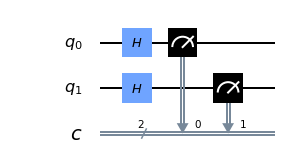

In [12]:
cir = QuantumCircuit(2,2)

# Apply the Hadamard gate to the first qubit (index 0)
cir.h(0)

# Apply the Hadamard gate to the second qubit (index 1)
cir.h(1)

cir.measure(0,0)
cir.measure(1,1)

# Draw the circuit
cir.draw('mpl')

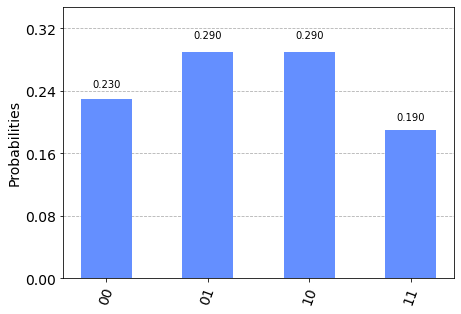

In [13]:
sim = Aer.get_backend('qasm_simulator')
result = execute(cir, sim, shots=100).result()
counts = result.get_counts(cir)
plot_histogram(counts)

Both qubits have an equal probability of being measured in either pure state $\vert0\rangle$ or $\vert1\rangle$. It follows that for the entire system we have equal probabilities of measuring $\vert00\rangle$, $\vert01\rangle$, $\vert10\rangle$, or $\vert11\rangle$.

## The Controlled-NOT Gate

The Controlled-NOT gate, or $CNOT$ gate, serves to tell whether the values of two qubits are different. The gate acts on two qubits - the control qubit and the target qubit. If both qubits are in the same pure state, the target qubit will output state $\vert0\rangle$. If they are in different pure states, the target qubit will output state $\vert1\rangle$. The control qubit remains unchanged. When the first qubit is the control and the second is the target, the $CNOT$ gate can be expressed by this matrix:

$$\begin{bmatrix}1&0&0&0\\0&0&0&1\\0&0&1&0\\0&1&0&0\end{bmatrix}$$

When the first qubit is the target and the second is the control, the $CNOT$ gate can be expressed by this matrix:

$$\begin{bmatrix}1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{bmatrix}$$

In the cells below, I show the mathematical result of applying the $CNOT$ gate in either direction to a quantum circuit in state $\vert00\rangle$.

In [14]:
# Matrix representation of a qubit in state |00 >
qu00 = np.matrix([[1],[0],[0],[0]])

# Matrix representation of the CNOT gate (first qubit is control, second is target)
cnot_gate_c1 = np.matrix([[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]])

# Matrix representation of the CNOT gate (second qubit is control, first is target)
cnot_gate_c2 = np.matrix([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])

print("00 state system:")
print(qu00)

print("CNOT gate matrix (first qubit is control):")
print(cnot_gate_c1)

print("CNOT gate matrix (second qubit is control):")
print(cnot_gate_c2)

00 state system:
[[1]
 [0]
 [0]
 [0]]
CNOT gate matrix (first qubit is control):
[[1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]]
CNOT gate matrix (second qubit is control):
[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


In [16]:
# Apply CNOT gate to 00 state system with first qubit as control and second qubit as target
qu00_cnot_c1 = cnot_gate_c1.dot(qu00)

# Apply CNOT gate to 00 state system with second qubit as control and first qubit as target
qu00_cnot_c2 = cnot_gate_c2.dot(qu00)

print("CNOT gate applied to 00 state system (first qubit is control):")
print(qu00_cnot_c1)

print("CNOT gate applied to 00 state system (second qubit is control):")
print(qu00_cnot_c2)

CNOT gate applied to 00 state system (first qubit is control):
[[1]
 [0]
 [0]
 [0]]
CNOT gate applied to 00 state system (second qubit is control):
[[1]
 [0]
 [0]
 [0]]


The output of either $CNOT$ gate is $\vert00\rangle$. Since the two qubits are in the same state, the output of the target qubit will be $\vert0\rangle$. The control qubit will remain unchanged in the state $\vert0\rangle$. Now, I'll demonstrate the result of applying the $CNOT$ gate to a circuit in state $\vert11\rangle$.

In [17]:
# Matrix representation of a qubit in state |11 >
qu11 = np.matrix([[0],[0],[0],[1]])

print("11 state system:")
print(qu11)

11 state system:
[[0]
 [0]
 [0]
 [1]]


In [18]:
# Apply CNOT gate to 11 state system with first qubit as control and second qubit as target
qu11_cnot_c1 = cnot_gate_c1.dot(qu11)

# Apply CNOT gate to 11 state system with second qubit as control and first qubit as target
qu11_cnot_c2 = cnot_gate_c2.dot(qu11)

print("CNOT gate applied to 11 state system (first qubit is control):")
print(qu11_cnot_c1)

print("CNOT gate applied to 11 state system (second qubit is control):")
print(qu11_cnot_c2)

CNOT gate applied to 11 state system (first qubit is control):
[[0]
 [1]
 [0]
 [0]]
CNOT gate applied to 11 state system (second qubit is control):
[[0]
 [0]
 [1]
 [0]]


The first output is $\vert01\rangle$. Since the two qubits have the same value, the second (target) qubit outputs state $\vert0\rangle$. The first (control) qubit remains unchanged in state $\vert1\rangle$. Similarly, the second output is $\vert10\rangle$. The first (target) qubit outputs state $\vert0\rangle$ and the second (control) qubit is unchanged.

In the cells below, I will demonstrate each of the four results in Qiskit.

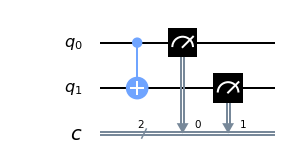

In [19]:
cir = QuantumCircuit(2,2)

# Apply the CNOT gate with the first qubit (index 0) as the control and the second qubit (index 1) as the target
cir.cx(0,1)

cir.measure(0,0)
cir.measure(1,1)

# Draw the circuit
cir.draw('mpl')

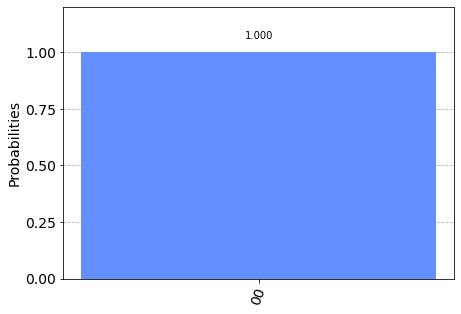

In [20]:
sim = Aer.get_backend('qasm_simulator')
result = execute(cir, sim, shots=100).result()
counts = result.get_counts(cir)
plot_histogram(counts)

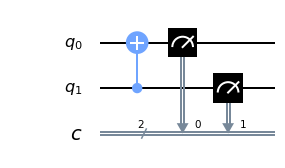

In [21]:
cir = QuantumCircuit(2,2)

# Apply the CNOT gate with the second qubit (index 1) as the control and the first qubit (index 0) as the target
cir.cx(1,0)

cir.measure(0,0)
cir.measure(1,1)

# Draw the circuit
cir.draw('mpl')

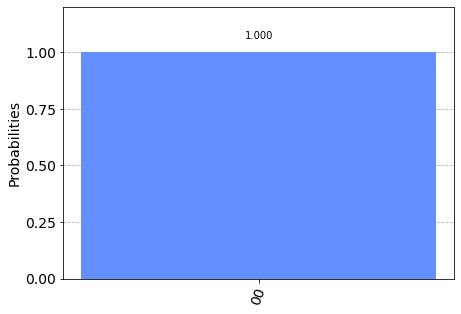

In [22]:
sim = Aer.get_backend('qasm_simulator')
result = execute(cir, sim, shots=100).result()
counts = result.get_counts(cir)
plot_histogram(counts)

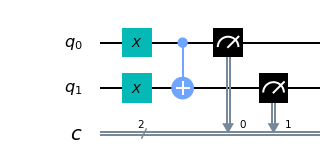

In [23]:
cir = QuantumCircuit(2,2)

# Perform a bit flip with the X gate on both qubits
cir.x(0)
cir.x(1)

# Apply the CNOT gate with the first qubit (index 0) as the control and the second qubit (index 1) as the target
cir.cx(0,1)

cir.measure(0,0)
cir.measure(1,1)

# Draw the circuit
cir.draw('mpl')

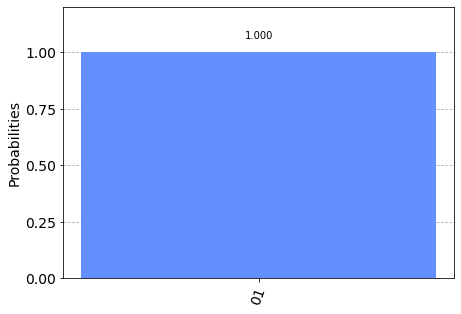

In [24]:
sim = Aer.get_backend('qasm_simulator')
result = execute(cir, sim, shots=100).result()
counts = result.get_counts(cir)
plot_histogram(counts)

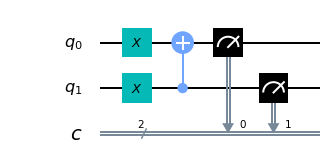

In [25]:
cir = QuantumCircuit(2,2)

# Perform a bit flip with the X gate on both qubits
cir.x(0)
cir.x(1)

# Apply the CNOT gate with the second qubit (index 1) as the control and the first qubit (index 0) as the target
cir.cx(1,0)

cir.measure(0,0)
cir.measure(1,1)

# Draw the circuit
cir.draw('mpl')

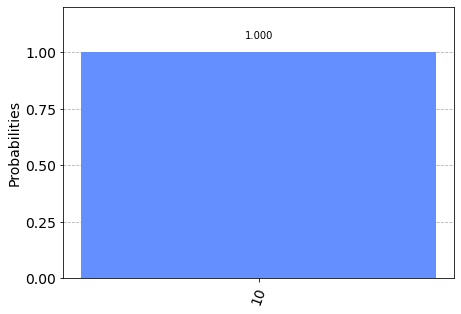

In [26]:
sim = Aer.get_backend('qasm_simulator')
result = execute(cir, sim, shots=100).result()
counts = result.get_counts(cir)
plot_histogram(counts)

This should provide a good idea of what the $CNOT$ gate does to qubits in pure states. In the next section, I will demonstrate how the $CNOT$ gate acts on mixed states.

## The Bell State

As I discussed in the last notebook, the Hadamard gate serves to put two qubits into superposition and can be represented by the following matrix:

$$\frac{1}{\sqrt{2}}  \begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}$$

Consider a system of two qubits. First, I will apply the Hadamard gate to the first qubit. Below is the mathematical result.

In [28]:
# Matrix representation of single qubit in state |0 >
qu0 = np.matrix([[1],[0]])

# Matrix representation of Hadamard gate
h_gate = np.matrix([[1/(2**.5),1/(2**.5)],[1/(2**.5),-1/(2**.5)]])

print("0 state qubit:")
print(qu0)

print("Hadamard gate matrix:")
print(h_gate)

0 state qubit:
[[1]
 [0]]
Hadamard gate matrix:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In [29]:
# Apply Hadamard gate to 0 state qubit
q0_h = h_gate.dot(qu0)

print("Hadamard gate applied to 0 state qubit:")
print(q0_h)

Hadamard gate applied to 0 state qubit:
[[0.70710678]
 [0.70710678]]


Now, the first qubit is in superposition and the second qubit is still in state $\vert0\rangle$. So, the entire system is mixed in states $\vert00\rangle$ and $\vert01\rangle$. Written as a matrix, this state looks like this:

$$\frac{1}{\sqrt{2}}  \begin{bmatrix}1\\1\\0\\0\end{bmatrix}$$

Next, I will apply the $CNOT$ gate to the circuit with the first qubit as the control and the second as the target. Below is the mathematical result.

In [30]:
# Matrix representation of the Hadamard gate applied to the first qubit
qu00_01 = np.matrix([[1/(2**.5)],[1/(2**.5)],[0],[0]])

# Apply CNOT gate with first qubit as control and second qubit as target
qu00_01_cnot_c1 = cnot_gate_c1.dot(qu00_01)

print("Final result:")
print(qu00_01_cnot_c1)

Final result:
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]


This state is called a "Bell State." It is useful in quantum computing because it has a 50% chance of being measured in the state $\vert00\rangle$ and a 50% chance of being measured in the state $\vert11\rangle$, but no chance of being measured in states $\vert01\rangle$ or $\vert10\rangle$.

Interestingly, measuring one qubit collapses the states of both qubits. For example, if the first qubit is measured in state $\vert0\rangle$, the second qubit will also collapse into state $\vert0\rangle$, despite not being measured.

In the cells below, I will produce the Bell State shown above using Qiskit.

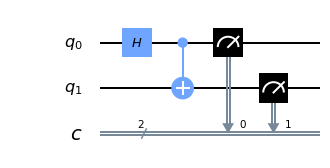

In [32]:
cir = QuantumCircuit(2,2)

# Apply the Hadamard gate to the first qubit (index 0)
cir.h(0)

# Apply the CNOT gate with the first qubit (index 0) as the control and the second qubit (index 1) as the target
cir.cx(0,1)

cir.measure(0,0)
cir.measure(1,1)

# Draw the circuit
cir.draw('mpl')

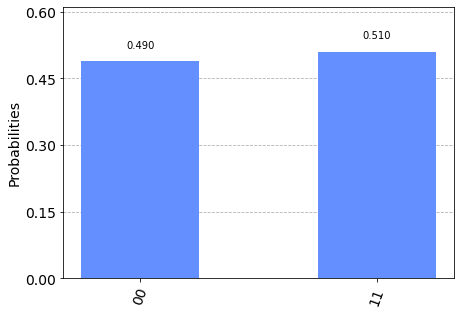

In [33]:
sim = Aer.get_backend('qasm_simulator')
result = execute(cir, sim, shots=100).result()
counts = result.get_counts(cir)
plot_histogram(counts)

As we expected, we only measure states $\vert00\rangle$ and $\vert11\rangle$.